# Tensorflow DNNClassifier

## 1. Introduction

A Tensorflow Deep Neural Network to classify review scores.

* context: [main notebook](../Trifork%20Machine%20Learning%20Solution.ipynb)
* algorithm: https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# The categorical labels
LABELS = [1, 2, 3, 4, 5]
SAVE_MODEL_PATH = '../models/model'

# The reviews, showing just the 101th review
data = pd.read_csv('../data/samples.csv')
data.iloc[100, 1]

"I ordered a Samsung S7 phone and it arrived last week May 4. I am very disappointed with the unit bcause the battery drain fast. I contacted their customer service the first time and the guy who answered the phone was looks unknowledgeable that's when  I told him that I need to speak to the manager or anyone who can really help me. The customer service agent then transfered the call and the manager rest assured that they will be refunding my bucks. Really disappointed!"

## 2. Data Preparation

The data is split 80/20 deterministically. Because the classifier used a label vocabulary, the 'Score' column is converted to strings.

In [2]:
# Convert labels to type string allowing use
# of label_vocabulary in DNNClassifier
data['Score'] = data['Score'].astype(str)

# Split data into train and test sets
train_df = data.sample(frac=0.5, random_state=200)
test_df = data.drop(train_df.index)

print('train:', len(train_df))
print('test:', len(test_df))

train: 1710
test: 1709


In [3]:
# Training input on the whole training set with no limit on training epochs.
train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["Score"], num_epochs=None, shuffle=True)

# Prediction on the whole training set.
predict_train_input_fn = tf.estimator.inputs.pandas_input_fn(
    train_df, train_df["Score"], shuffle=False)

# Prediction on the test set.
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
    test_df, test_df["Score"], shuffle=False)

In [4]:
# https://www.tensorflow.org/hub/api_docs/python/hub/text_embedding_column
embedded_text_feature_column = hub.text_embedding_column(
    key="Review", 
    module_spec="https://tfhub.dev/google/nnlm-en-dim128/1")

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.


Train and predict input functions are generated that can be used by the estimator. Finally, a feature column is used to map input data to representations that can be used by the estimator. The [nnlm-en-dim128/1 module](https://www.tensorflow.org/hub/modules/google/nnlm-en-dim128/1) is used for this mapping. It cleans the input data, and [hashes the words into buckets](https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html).

## 3. Model Building

The Deep Neural Network Classifier (DNNClassifier) estimator will be trained using a gradient descent optimizer, two layers of 500 and 100, using relu activator function (by default), and a learning rate of 0.003.

In [5]:
# https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier
estimator = tf.estimator.DNNClassifier(
    hidden_units=[500, 100],
    feature_columns=[embedded_text_feature_column],
    n_classes=len(LABELS),
    activation_fn=tf.nn.relu,
    optimizer=tf.train.AdagradOptimizer(learning_rate=0.003),
    label_vocabulary=[str(x) for x in LABELS])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_is_chief': True, '_tf_random_seed': None, '_model_dir': '/tmp/tmpqxpi4cgz', '_train_distribute': None, '_task_id': 0, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_save_checkpoints_steps': None, '_task_type': 'worker', '_device_fn': None, '_evaluation_master': '', '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f96af975cc0>, '_global_id_in_cluster': 0, '_session_config': None}


In [6]:
# Training the model
estimator.train(input_fn=train_input_fn, steps=10000);

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable dnn/input_from_feature_columns/input_layer/Review_hub_module_embedding/module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/32f2b2259e1cc8ca58c876921748361283e73997/variables/variables' with embeddings
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpqxpi4cgz/model.ckpt.
INFO:tensorflow:loss = 212.5026, step = 1
INFO:tensorflow:global_step/sec: 148.759
INFO:tensorflow:loss = 107.26344, step = 101 (0.673 sec)
INFO:tensorflow:global_step/sec: 154.524
INFO:tensorflow:loss = 89.34348, step = 201 (0.647 sec)
INFO:tensorflow:global_step/sec: 142.243
INFO:tensorflow:loss = 84.03978, step = 301 (0.703 sec)
INFO:tensorflow:global_step/sec: 148.99
INFO:tensorflow:loss = 82.79942, step = 401 (0.671 sec)
INFO:tens

INFO:tensorflow:loss = 2.502552, step = 7801 (0.603 sec)
INFO:tensorflow:global_step/sec: 171.955
INFO:tensorflow:loss = 2.6547666, step = 7901 (0.581 sec)
INFO:tensorflow:global_step/sec: 173.953
INFO:tensorflow:loss = 4.2660975, step = 8001 (0.575 sec)
INFO:tensorflow:global_step/sec: 173.956
INFO:tensorflow:loss = 2.691177, step = 8101 (0.575 sec)
INFO:tensorflow:global_step/sec: 174.66
INFO:tensorflow:loss = 3.5550537, step = 8201 (0.572 sec)
INFO:tensorflow:global_step/sec: 180.762
INFO:tensorflow:loss = 2.4736707, step = 8301 (0.553 sec)
INFO:tensorflow:global_step/sec: 176.012
INFO:tensorflow:loss = 2.1807222, step = 8401 (0.568 sec)
INFO:tensorflow:global_step/sec: 176.877
INFO:tensorflow:loss = 1.8156774, step = 8501 (0.565 sec)
INFO:tensorflow:global_step/sec: 169.517
INFO:tensorflow:loss = 1.969332, step = 8601 (0.591 sec)
INFO:tensorflow:global_step/sec: 168.963
INFO:tensorflow:loss = 2.141141, step = 8701 (0.591 sec)
INFO:tensorflow:global_step/sec: 179.382
INFO:tensorflow

## 4. Test Results

### 4.1 Results

In the next cells, the accuracy of the train and test sets are printed. The training set accuracy should be very high, and the test set accuracy is probably a lot lower. 

In [7]:
train_eval_result = estimator.evaluate(input_fn=predict_train_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)

print("Training set accuracy: {accuracy}".format(**train_eval_result))
print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable dnn/input_from_feature_columns/input_layer/Review_hub_module_embedding/module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/32f2b2259e1cc8ca58c876921748361283e73997/variables/variables' with embeddings
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-24-12:09:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqxpi4cgz/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-24-12:09:55
INFO:tensorflow:Saving dict for global step 10000: accuracy = 1.0, average_loss = 0.013610808, global_step = 10000, loss = 1.6624631
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpqxpi4cgz/model.ckpt-10000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable dnn/input_from_feature_columns/input_layer/Review_hub_m

The test set contains new data that hasn't been used to train the model, it resembles a real life review. The accuracy is a meaningful metric when the distribution of target variable classes is pretty much even (which in this case it is not).

### 4.2 Confusion Matrix
A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a convenient visualization to show the TP's, TN's, FP's, and FN's. Accuracy, precision, recall, and specificity can be read from it. Additionally, an F1 score may be calculated to represent both recall and specificity. The trace of a confusion matrix should be high.

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable dnn/input_from_feature_columns/input_layer/Review_hub_module_embedding/module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/32f2b2259e1cc8ca58c876921748361283e73997/variables/variables' with embeddings
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqxpi4cgz/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


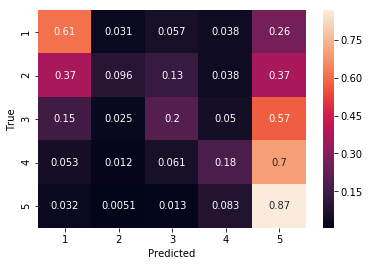

In [8]:
# Convert labels back to type int to match predictions
test_df['Score'] = test_df['Score'].astype(int)

# Gets prediction values for estimator using input function
def get_predictions(estimator, input_fn):
    return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.confusion_matrix(test_df["Score"], 
        get_predictions(estimator, predict_test_input_fn))
    with tf.Session() as session:
        cm_out = session.run(cm)

# Exclude first row and last col
cm_out = cm_out[1:, :-1]

# Normalize the confusion matrix so that each row sums to 1.
cm_norm = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");
plt.show();

In [9]:
# Trace divided by sum of matrix
def accuracy(cm):
    return cm.trace() / cm.sum()
    
# TP / TP + FP
def precision(cm, col_nr):
    col_sum = cm[col_nr, :].sum()
    if not col_sum:
        return 0
    return cm[col_nr, col_nr] / col_sum

# TP / TP + FN
def recall(cm, row_nr):
    row_sum = cm[:, row_nr].sum()
    if not row_sum:
        return 0
    return cm[row_nr, row_nr] / row_sum

# TN / TN + FP
def specificity(cm, row_nr):
    TN = cm.trace() - cm[row_nr, row_nr]
    FP = cm[:, row_nr].sum() - cm[row_nr, row_nr]
    if not TN and not FP:
        return 0
    return TN / (TN + FP)

# Represents precision and recall
def f1(cm, n):
    p = precision(cm, n)
    r = recall(cm, n)
    if not p or not r:
        return 0
    return 2 * p * r / (p + r)
    
print('confusion matrix:\n', cm_out)
print()
print('accuracy:', accuracy(cm_out))
for n in range(5):
    print(n + 1)
    print('precision:', precision(cm_out, n))
    print('recall', recall(cm_out, n))
    print('specificity', specificity(cm_out, n))
    print('f1', f1(cm_out, n))
    print()

confusion matrix:
 [[  97    5    9    6   42]
 [  19    5    7    2   19]
 [  12    2   16    4   46]
 [  13    3   15   43  170]
 [  37    6   15   98 1018]]

accuracy: 0.689877121123464
1
precision: 0.610062893081761
recall 0.5449438202247191
specificity 0.9303525365434222
f1 0.57566765578635

2
precision: 0.09615384615384616
recall 0.23809523809523808
specificity 0.9865546218487395
f1 0.136986301369863

3
precision: 0.2
recall 0.25806451612903225
specificity 0.9619520264681555
f1 0.22535211267605634

4
precision: 0.1762295081967213
recall 0.28104575163398693
specificity 0.9117174959871589
f1 0.21662468513853902

5
precision: 0.8671209540034072
recall 0.7861003861003861
specificity 0.3675799086757991
f1 0.8246253543944917



The resulting model is perfect for predicting reviews from the train data. When it faces real data, it has a lower accuracy by far. 

### 4.3 ROC Curve

The Receiver Operating Characteristic curve plots the true positive rate against the false positive rate. The AUC should be as close to 1 as possible.

In [10]:
def get_probabilities(estimator, input_fn):
    return np.matrix([x['probabilities'] for x in estimator.predict(input_fn=input_fn)])

probabilities = get_probabilities(estimator, predict_test_input_fn)
actual = test_df.iloc[:, 2]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable dnn/input_from_feature_columns/input_layer/Review_hub_module_embedding/module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/32f2b2259e1cc8ca58c876921748361283e73997/variables/variables' with embeddings
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqxpi4cgz/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


(0, 1)

(0, 1)

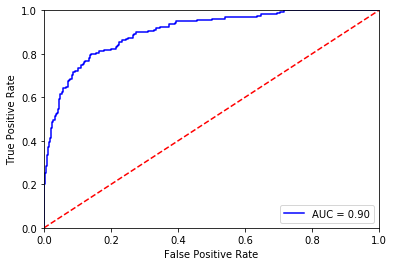

(0, 1)

(0, 1)

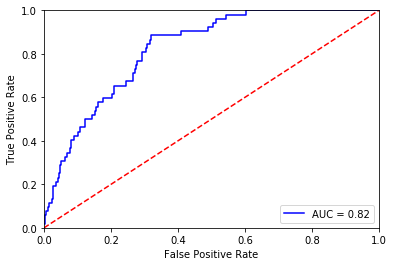

(0, 1)

(0, 1)

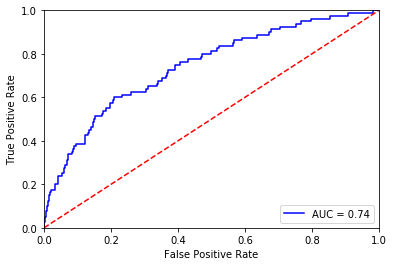

(0, 1)

(0, 1)

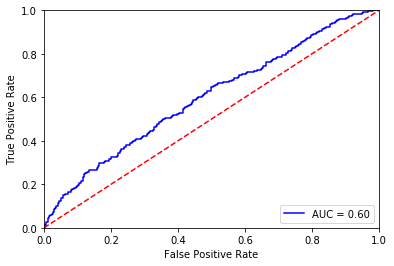

(0, 1)

(0, 1)

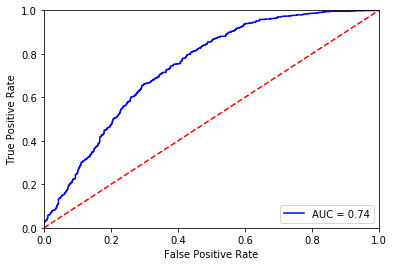

In [11]:
def roc_for_class(pos):
    return roc_curve(actual, probabilities[:, pos], pos_label=pos + 1)

# Show ROC for each class
for i in range(5):
    fpr, tpr, thresholds = roc_for_class(i)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### 4.4 Improvements

Adding more training data so that the distribution of scores is more even.

Some [techniques](https://www.youtube.com/watch?v=u4alGiomYP4&feature=youtu.be&t=2063) to combat overfitting in neural networks that may be applied are:

regularization (dropout)
reducing amount of layers / neurons (using [cross validation](https://www.researchgate.net/post/How_to_decide_the_number_of_hidden_layers_and_nodes_in_a_hidden_layer) as feedback)
Tuning the learning rate. As shown in the video above, it is useful to apply an exponential decay to the learning rate while training to reduce the noise.

## 5. Run

In [12]:
# Some personal reviews
classify_these = np.array([
    "Ordered an electric lawn mower. I am very disappointed with it and I contacted their customer service the first time and the guy who answered the phone was looks unknowledgeable that's when  I told him that I need to speak to the manager or anyone who can really help me. The customer service agent then transfered the call and the manager rest assured that they will be refunding my bucks. Really disappointed!",
    "Great service, the refridgerator I ordered was deliverd one day after",
    "Totally awesome! Best service in the history of mankind. Super satisfied!",
    "meh it was bad",
    "This classifier is pretty good, this should be a five",
    "Why didn't this review score worse? I'm very disappointed in this classifier. A terrible classification this is, I want a refund..."
])

# Make predictions of the personal reviews
predict = tf.estimator.inputs.numpy_input_fn(x={"Review": classify_these}, num_epochs=1, shuffle=False)
predictions = list(estimator.predict(input_fn=predict))
predicted_classes = [p["classes"] for p in predictions]
predicted_classes

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable dnn/input_from_feature_columns/input_layer/Review_hub_module_embedding/module/embeddings/part_0:0 from checkpoint b'/tmp/tfhub_modules/32f2b2259e1cc8ca58c876921748361283e73997/variables/variables' with embeddings
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpqxpi4cgz/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([b'3'], dtype=object),
 array([b'4'], dtype=object),
 array([b'5'], dtype=object),
 array([b'3'], dtype=object),
 array([b'5'], dtype=object),
 array([b'1'], dtype=object)]

## 6. Saving and Restoring

In [13]:
# Saving the model
def serving_input_fn():
    inputs = {'Review': tf.placeholder(tf.string)}
    return tf.estimator.export.ServingInputReceiver(inputs, inputs)

if not os.path.exists(SAVE_MODEL_PATH):
    os.replace(estimator.export_savedmodel('../models', serving_input_fn).decode("utf-8"), SAVE_MODEL_PATH)
else:
    print('Model not saved, a model already exists in', SAVE_MODEL_PATH)

Model not saved, a model already exists in ../models/model


In [14]:
# Restoring the model
predict_fn = tf.contrib.predictor.from_saved_model(SAVE_MODEL_PATH)

INFO:tensorflow:Restoring parameters from ../models/model/variables/variables


In [15]:
# Make a prediction with the restored model
predictions = predict_fn({"inputs": ["Ordered an electric lawn mower. I am very disappointed with it and I contacted their customer service the first time and the guy who answered the phone was looks unknowledgeable that's when  I told him that I need to speak to the manager or anyone who can really help me. The customer service agent then transfered the call and the manager rest assured that they will be refunding my bucks. Really disappointed!"]})

highest_score_index = np.argmax(predictions['scores'])

print(predictions['classes'])
print(predictions['scores'])
print('highest score index: ', highest_score_index)
print('predicted class: ', predictions['classes'][0][highest_score_index].decode("utf-8"))

[[b'1' b'2' b'3' b'4' b'5']]
[[0.2758189  0.00808376 0.20600097 0.4813096  0.02878675]]
highest score index:  3
predicted class:  4
